In [49]:
%reset -f

## Assignment E - Brightfield histology color deconvolution
- Author: Catherine Chia and Aoming Sun
- Teacher and TAs: Marten Postma, Aaron Lin, Aoming Sun, Catherine Chia
- Date: 21st June, 2023

### Outline of workflow
1. Prerequisites: 
- Use ImageJ to crop and export images: Stain 1, Stain 2, Background, __OR__ 
- Use ImageJ to export the RGB vectors for the same images

2. Preprocessing

3. Color Deconvolution

4. Separate stains

In [50]:
#Libraries
from matplotlib import pyplot as plt, patches
import numpy as np

#Enable nice output printing features
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last_expr_or_assign'
import warnings
warnings.filterwarnings('ignore')

#Add other libraries as you see fit
import glob
from skimage import io

### __Preprocessing steps__

In [51]:
#Start coding here

#Import IHC image and split it to RGB
img_ihc = io.imread('IPQDA_23_ASS_E_DATA/H_E.tif')
img_ihc_red = img_ihc[:, :, 0]
img_ihc_green = img_ihc[:, :, 1]
img_ihc_blue = img_ihc[:, :, 2]

#Import cropped stain1, stain2 and background ROI images, OR import RGB vectors of the ROIs
img_eosin = io.imread('IPQDA_23_ASS_E_DATA/eosin.tif')
img_hematoxylin = io.imread('IPQDA_23_ASS_E_DATA/hematoxylin.tif')
img_background = io.imread('IPQDA_23_ASS_E_DATA/background.tif')

#End coding here

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


array([[[255, 245, 254],
        [255, 245, 254],
        [254, 244, 253],
        ...,
        [250, 243, 251],
        [252, 242, 251],
        [253, 243, 252]],

       [[255, 245, 254],
        [255, 246, 255],
        [254, 244, 253],
        ...,
        [255, 248, 255],
        [255, 246, 255],
        [255, 247, 255]],

       [[254, 244, 253],
        [254, 244, 253],
        [254, 244, 253],
        ...,
        [255, 249, 255],
        [255, 248, 255],
        [255, 248, 255]],

       ...,

       [[248, 241, 249],
        [249, 242, 250],
        [252, 245, 253],
        ...,
        [254, 247, 254],
        [252, 245, 252],
        [252, 245, 252]],

       [[250, 243, 251],
        [250, 243, 251],
        [251, 244, 252],
        ...,
        [252, 245, 252],
        [249, 242, 249],
        [248, 241, 248]],

       [[255, 248, 255],
        [252, 245, 253],
        [249, 242, 250],
        ...,
        [255, 248, 255],
        [255, 248, 255],
        [253, 246, 253]]

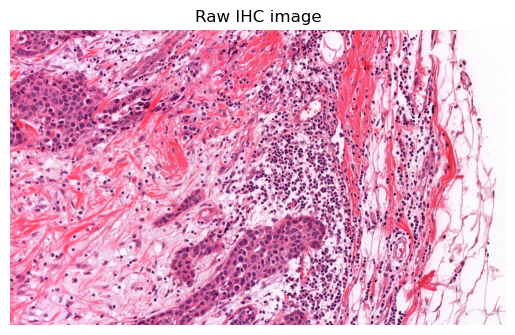

In [52]:
#Inspect imported IHC image
plt.title("Raw IHC image")
plt.axis('off')
plt.imshow(img_ihc)

### Calculate RGB mean of the images

In [53]:
#Start coding here

#Calculate mean of image for each RGB channels. If you use RGB vectors, assign them directly to the variables here
mean_img_stain1 = np.mean(img_eosin, axis=(0, 1))
mean_img_stain2 = np.mean(img_hematoxylin, axis=(0, 1))
mean_img_background = np.mean(img_background, axis=(0, 1))

#End coding here

print(mean_img_stain1)
print(mean_img_stain2)
print(mean_img_background)

[57.29166667  8.33333333 60.44444444]
[250.54035088  69.43157895 103.45263158]
[252.54678363 245.39181287 252.87426901]


### Inspect ROIs of stains and background to ensure correct stain color selection

#39083c
#fa4567
#fcf5fc


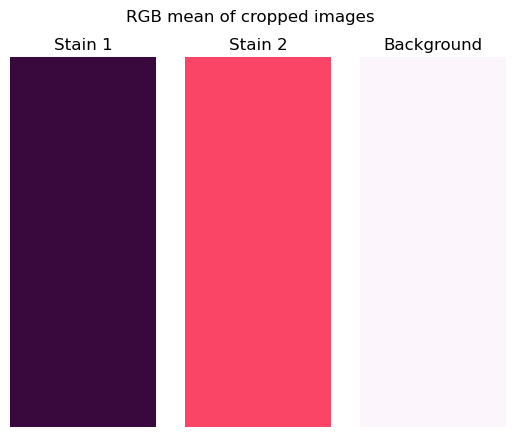

In [54]:
#Convert RGB values to Hex color values for visualization
hex_img_stain1 = '#%02x%02x%02x' % tuple(mean_img_stain1.astype(int))
hex_img_stain2 = '#%02x%02x%02x' % tuple(mean_img_stain2.astype(int))
hex_img_background = '#%02x%02x%02x' % tuple(mean_img_background.astype(int))

print(hex_img_stain1)
print(hex_img_stain2)
print(hex_img_background)

#Visualization of RGB mean of cropped images
fig, axs = plt.subplots(1,3)

fig.suptitle('RGB mean of cropped images')

rectangle_stain1 = patches.Rectangle((0, 0), 1, 1, facecolor=hex_img_stain1)
rectangle_stain2 = patches.Rectangle((0, 0), 1, 1, facecolor=hex_img_stain2)
rectangle_background = patches.Rectangle((0, 0), 1, 1, facecolor=hex_img_background)

axs[0].add_patch(rectangle_stain1)
axs[1].add_patch(rectangle_stain2)
axs[2].add_patch(rectangle_background)
axs[0].set_title('Stain 1')
axs[1].set_title('Stain 2')
axs[2].set_title('Background')

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
plt.show()

### __Color Deconvolution__

### Calculate transmittance, T and convert it to absorbances, OD according to Beer–Lambert law  

In [55]:
#Calculate transmittances, T for each stain
T_stain1 = mean_img_background/mean_img_stain1
T_stain2 = mean_img_background/mean_img_stain2
OD_stain1 = np.log10(T_stain1)
OD_stain2 = np.log10(T_stain2)

print(OD_stain1)
print(OD_stain2)

[0.64425039 1.46904132 0.62154825]
[0.00346416 0.54830303 0.3881631 ]


### Normalize the absorbances to vector lengths

In [56]:
#Start coding here

# Normalize the absorbances
OD_stain1_norm = OD_stain1 / np.max(OD_stain1)
OD_stain2_norm = OD_stain2 / np.max(OD_stain2)

#End coding here

print(OD_stain1_norm)
print(OD_stain2_norm)

[0.43855158 1.         0.42309787]
[0.00631797 1.         0.70793535]


### Form a deconvolution matrix

In [57]:
#Start coding here

#Combine OD_stain1_norm and OD_stain2_norm to form a normalized OD matrix M
M = np.column_stack((OD_stain1_norm, OD_stain2_norm))

#Calculate the deconvolution matrix according to Linear regression
MT = np.linalg.pinv(M)
MT_M = np.dot(MT, M)
inversed_MT_M = np.linalg.inv(MT_M)
D = np.dot(inversed_MT_M, MT)

#End coding here

print("M")
print(M)
print("M transposed")
print(MT)
print("Inversed M transposed multiplied with M")
print(inversed_MT_M)
print("Deconvolution matrix, D")
print(D)

M
[[0.43855158 0.00631797]
 [1.         1.        ]
 [0.42309787 0.70793535]]
M transposed
[[ 1.79250187  0.54843814 -0.79069806]
 [-1.55078077  0.19036002  1.15750366]]
Inversed M transposed multiplied with M
[[ 1.00000000e+00 -2.22044605e-16]
 [-1.11022302e-16  1.00000000e+00]]
Deconvolution matrix, D
[[ 1.79250187  0.54843814 -0.79069806]
 [-1.55078077  0.19036002  1.15750366]]


### Calculate the coefficient for each stain 

In [58]:
#Convert pixel intensity to transmittance to absorbance according to Beer-Lambert Law on the IHC image
#Calculate the transmittance
T_img_ihc = mean_img_background/img_ihc

#Because of the logarithmic function in the next step, we assign all transmittance value less than 1 to 1 
T_img_ihc[T_img_ihc<1] = 1

In [59]:
#Start coding here

#Calculate the absorbance
OD_img_ihc = -np.log10(T_img_ihc)


#Coefficient matrix
coeffs = np.dot(np.reshape(OD_img_ihc, (-1, 3)), D.T)


#Extracting the individual coefficients from the coefficient matrix
#Which are essentially the orthogonal representation of the stains of the IHC image
coeff_stain1 = coeffs[:, 0]
coeff_stain2 = coeffs[:, 1]


#End coding here

print(coeff_stain1.shape)
print(coeff_stain2.shape)

(8951993,)
(8951993,)


### __Separate stains__

### Multiply the coefficients with the stain absorbance to get the image absorbance per stain

In [60]:
#Initialize the image absorbance container per stain
OD_img_ihc_stain1 = np.zeros((img_ihc.shape[0], img_ihc.shape[1], img_ihc.shape[2]))
OD_img_ihc_stain2 = np.zeros((img_ihc.shape[0], img_ihc.shape[1], img_ihc.shape[2]))


#Start coding here

#Multiply the coefficients with the stain absorbance per stain. Do it independently for each RGB layer
OD_img_ihc_stain1 = np.reshape(coeff_stain1, img_ihc_red.shape)[:, :, np.newaxis] * OD_stain1
OD_img_ihc_stain2 = np.reshape(coeff_stain2, img_ihc_red.shape)[:, :, np.newaxis] * OD_stain2


#End coding here

array([[[-1.24807725e-03, -1.97544120e-01, -1.39848466e-01],
        [-1.19053577e-03, -1.88436524e-01, -1.33400877e-01],
        [-1.12894807e-03, -1.78688499e-01, -1.26499906e-01],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 6.11168401e-06,  9.67349764e-04,  6.84821097e-04],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-1.08526707e-03, -1.71774725e-01, -1.21605401e-01],
        [-9.84750556e-04, -1.55865096e-01, -1.10342412e-01],
        [-9.44092563e-04, -1.49429800e-01, -1.05786638e-01],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 8.30244592e-06,  1.31410084e-03,  9.30298444e-04],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-1.01066830e-03, -1.59967325e-01, -1.13246525e-01],
        [-8.83168771e-04, -1.39786857e-01, -9.89600584e-02],
        [-8.42463034e-04, -1.33344004e-01, -9.43989346e-02],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,

### Convert the image absorbance to image transmittance  

In [61]:
#Convert absorbance to transmittance
T_img_ihc_stain1 = 10**(-OD_img_ihc_stain1)
T_img_ihc_stain2 = 10**(-OD_img_ihc_stain2)

array([[[1.00287794, 1.57595611, 1.37990271],
        [1.00274507, 1.54325085, 1.35956782],
        [1.00260288, 1.50899743, 1.33813493],
        ...,
        [1.        , 1.        , 1.        ],
        [0.99998593, 0.99777507, 0.99842438],
        [1.        , 1.        , 1.        ]],

       [[1.00250204, 1.48516507, 1.32313879],
        [1.00227004, 1.43174309, 1.28926565],
        [1.00217622, 1.41068419, 1.27581187],
        ...,
        [1.        , 1.        , 1.        ],
        [0.99998088, 0.99697874, 0.9978602 ],
        [1.        , 1.        , 1.        ]],

       [[1.00232986, 1.44533102, 1.29791582],
        [1.00203564, 1.37970697, 1.25591445],
        [1.00194173, 1.35938979, 1.24279339],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.00274379, 1.5429388 , 1.3593732 ],
        [1.00258248, 1.50414422, 1.33508676],
        [1.00240615, 1

### Clip each layer in the image transmittance to values between 0 and 1, preparing for conversion to values between 0 and 255 later

In [62]:
#Clip each layer to 0,1
T_img_ihc_stain1[T_img_ihc_stain1>1] = 1
T_img_ihc_stain2[T_img_ihc_stain2>1] = 1
T_img_ihc_stain1[T_img_ihc_stain1<0] = 0
T_img_ihc_stain2[T_img_ihc_stain2<0] = 0
T_img_ihc_stain1_norm = T_img_ihc_stain1
T_img_ihc_stain2_norm = T_img_ihc_stain2

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [0.99998593, 0.99777507, 0.99842438],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [0.99998088, 0.99697874, 0.9978602 ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

### Convert the image transmittance to values between 0 and 255 (integers), so that plotting is possible

In [63]:
#Start coding here

T_img_ihc_stain1 = 10 ** (-OD_img_ihc_stain1)

T_img_ihc_stain2 = 10 ** (-OD_img_ihc_stain2)

#End coding here


array([[[1.00287794, 1.57595611, 1.37990271],
        [1.00274507, 1.54325085, 1.35956782],
        [1.00260288, 1.50899743, 1.33813493],
        ...,
        [1.        , 1.        , 1.        ],
        [0.99998593, 0.99777507, 0.99842438],
        [1.        , 1.        , 1.        ]],

       [[1.00250204, 1.48516507, 1.32313879],
        [1.00227004, 1.43174309, 1.28926565],
        [1.00217622, 1.41068419, 1.27581187],
        ...,
        [1.        , 1.        , 1.        ],
        [0.99998088, 0.99697874, 0.9978602 ],
        [1.        , 1.        , 1.        ]],

       [[1.00232986, 1.44533102, 1.29791582],
        [1.00203564, 1.37970697, 1.25591445],
        [1.00194173, 1.35938979, 1.24279339],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.00274379, 1.5429388 , 1.3593732 ],
        [1.00258248, 1.50414422, 1.33508676],
        [1.00240615, 1

### Visualize deconvolved images

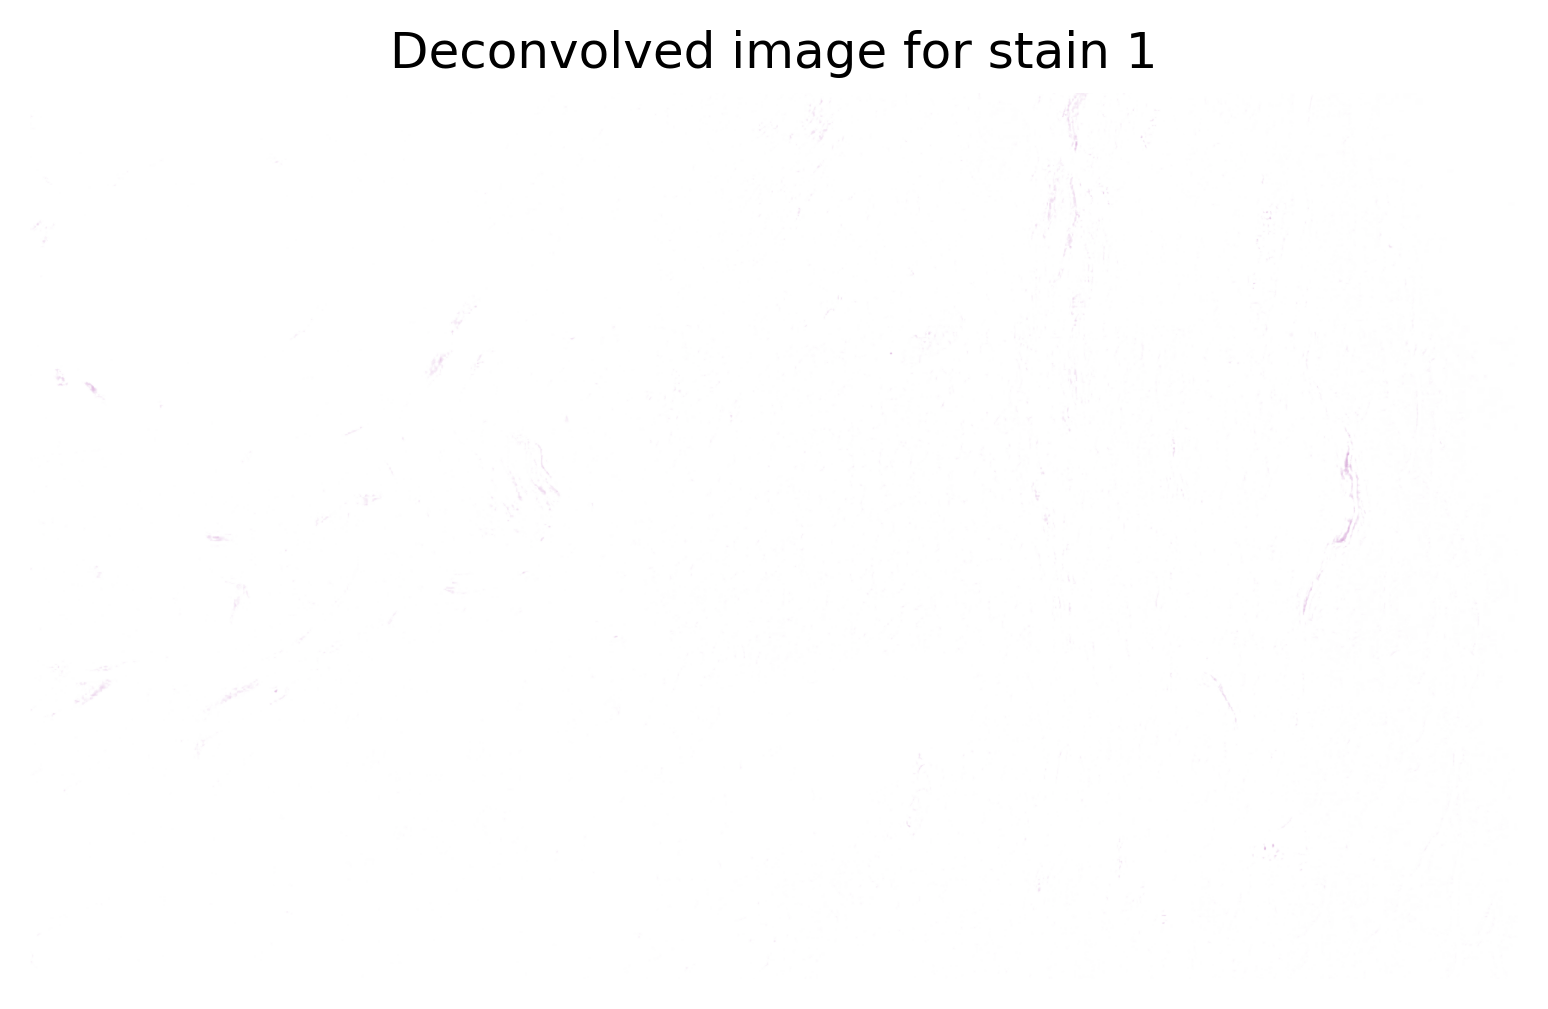

In [64]:
#Display deconvolved image for stain 1
fig = plt.figure(dpi=300)
plt.title("Deconvolved image for stain 1")
plt.axis('off')
plt.imshow(T_img_ihc_stain1_norm)
fig.savefig('T_img_ihc_stain1_norm.tif')


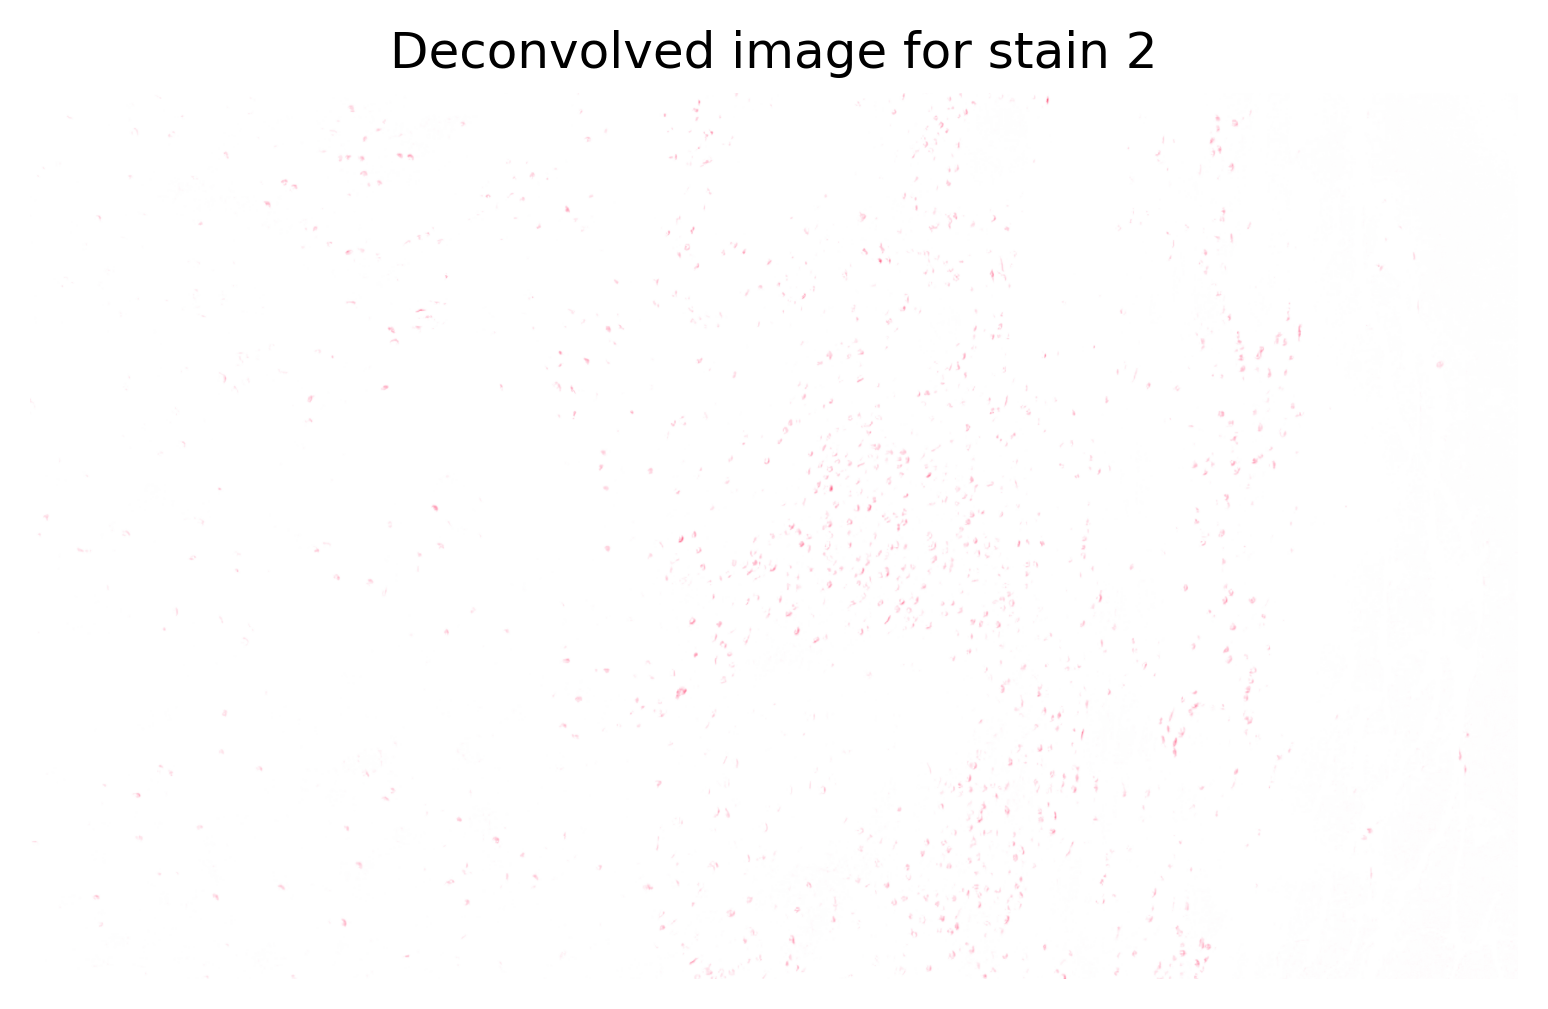

In [65]:
#Display and export deconvolved image for stain 1
fig = plt.figure(dpi=300)
plt.title("Deconvolved image for stain 2")
plt.axis('off')
plt.imshow(T_img_ihc_stain2_norm)
fig.savefig('T_img_ihc_stain2_norm.tif')